Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились очень информативными, их было интересно читать.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* К сожалению проект требует небольших доработок. Однако, изменения не займут много времени.
* Также я добавил несколько советов. Пожалуйста, обрати на них внимание.
* Возможно, тренажер не даст запустить код модели еще раз. Если так случится, то отправляй проект я его зачту.
* Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После изменений проект улучшился и может быть зачтен.
* Радует, что были учтены еще и советы.
* Я оставил новый поясняющий комментарий, он обозначен фразой "ревью 2".
* Удачи в дальнейшем обучении и будущих работах!

# Описание проекта
**Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. 
Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:**
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы.
* Контролировать добросовестность кассиров при продаже алкоголя.
* Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Инструкция по выполнению проекта

1. Исследовательский анализ данных:
    * Посмотрите на размер выборки.
    * Постройте график распределения возраста в выборке.
    * Напечатайте на экране 10–15 фотографий и посмотрите, как устроен датасет.
    
2. Постройте и обучите свёрточную нейронную сеть на датасете с фотографиями людей. Добейтесь значения MAE на тестовой выборке не больше 8.
3. Анализ обученной модели.


## Описание данных
***Данные взяты с сайта ChaLearn Looking at People.***
* Они находятся в папке /datasets/faces/.
* В вашем распоряжении одна папка со всеми изображениями (/final_files) и csv-файл labels.csv с двумя колонками: file_name и real_age.
*Извлечь данные из папки вам поможет метод ImageDataGenerator —flow_from_dataframe(dataframe, directory, ...).*

# 1. Исследовательский анализ данных

In [1]:
#импорт
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#загрузка
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

features, target = next(train_gen_flow)

Found 7591 validated image filenames.


In [3]:
#распечатаем один кейс
target[0],features[0]

(50,
 array([[[0.5764706 , 0.5137255 , 0.454902  ],
         [0.53333336, 0.47058827, 0.41176474],
         [0.5294118 , 0.4666667 , 0.40784317],
         ...,
         [0.48235297, 0.4156863 , 0.30588236],
         [0.49411768, 0.427451  , 0.31764707],
         [0.49803925, 0.43137258, 0.32156864]],
 
        [[0.5176471 , 0.454902  , 0.39607847],
         [0.5058824 , 0.4431373 , 0.38431376],
         [0.5529412 , 0.4901961 , 0.43137258],
         ...,
         [0.49803925, 0.43137258, 0.32156864],
         [0.50980395, 0.4431373 , 0.33333334],
         [0.50980395, 0.4431373 , 0.33333334]],
 
        [[0.5176471 , 0.45098042, 0.38823533],
         [0.5058824 , 0.43921572, 0.37647063],
         [0.5176471 , 0.45098042, 0.38823533],
         ...,
         [0.5019608 , 0.43529415, 0.3254902 ],
         [0.50980395, 0.4431373 , 0.33333334],
         [0.5058824 , 0.43921572, 0.32941177]],
 
        ...,
 
        [[0.06666667, 0.45882356, 0.52156866],
         [0.08235294, 0.47450984, 0.

<div class="alert alert-block alert-info">
<b>Совет: </b> Не забывай про методы первичного анализа (head и info), которые нужно использовать после загрузки файла.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Уточните, плз,  комментарий. Как я понимаю для более чем 2-мерных массивов данные методы не применимы. <br>
</div>

<div class="alert alert-block alert-warning">
<b>Исправление:</b> Поэтому, что посмотреть на данные ближе я распечатала один кейс
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Я имел ввиду загруженный датасет (labels). Полезно посмотреть, что в нем все хорошо с кодировкой, типы соответствуют содержанию колонок и нет пропусков.
</div>

**Посмотрите на размер выборки.**

In [4]:
print("Выборка в",len(labels),"кейсов")

Выборка в 7591 кейсов


**Постройте график распределения возраста в выборке.**

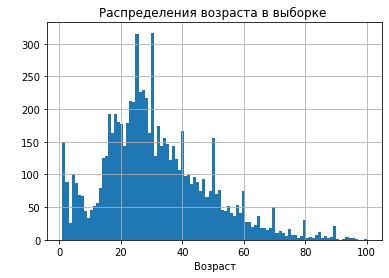

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

In [5]:
plt.figure()
labels['real_age'].hist(bins = 100)
plt.xlabel('Возраст')
plt.ylabel(' ')
plt.title('Распределения возраста в выборке ')
plt.show()

labels['real_age'].describe()

Возраст от 1 до 100 лет. Больше всего фотографий взрослого возраста (20 - 40 лет).

<div class="alert alert-block alert-success">
<b>Успех:</b> Гистограммы оформлена хорошо.
</div>

**Напечатайте на экране 10–15 фотографий и посмотрите, как устроен датасет.**

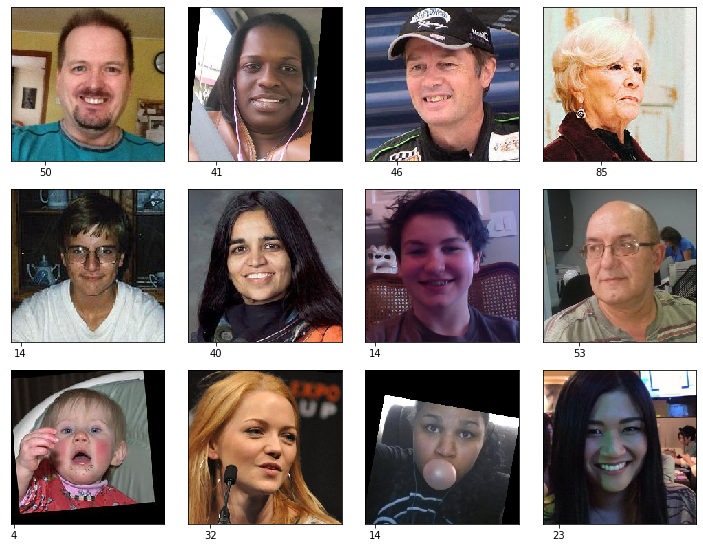

In [6]:
# выводим 12 изображений
i = 0
fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([target[i]])
    plt.yticks([])
    plt.tight_layout()

<div class="alert alert-block alert-info">
<b>Совет: </b> В названиях (title) изображений можно указать возраст.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> На фото добавлен возраст. </div>

In [7]:
print("Форма массива ",features.shape)

Форма массива  (32, 224, 224, 3)


Некоторые фото уже искажены (повернуты) и возможно обучение будет достаточно точным без аугментации. 

Фото цветные. Массив 3 мерный.

<div class="alert alert-block alert-success">
<b>Успех:</b> В целом, анализ распределения целевога признака и изображений проведен.
</div>

# 2. Обучение модели

**Постройте и обучите свёрточную нейронную сеть на датасете с фотографиями людей. Добейтесь значения MAE на тестовой выборке не больше 8.**

**Функцию загрузки тестовой выборки load_test(path) напишите самостоятельно. Вместе со старыми функциями в коде должны быть:**
* load_train(path),
* load_test(path),
* create_model(input_shape),
* train_model(model, train_data, test_data, batch_size, epochs, steps_per_epoch, validation_steps).

```python

import numpy as np
import pandas as pd
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


def load_train(path):
    train_datagen = ImageDataGenerator(
        rescale=1 / 255.,
        validation_split=0.1,
        horizontal_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2
    )
    labels = pd.read_csv(path + 'labels.csv')
    train_flow = train_datagen.flow_from_dataframe(
        labels,
        directory=path + 'final_files/',
        x_col="file_name",
        y_col="real_age",
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_flow


def load_test(path):
    test_datagen = ImageDataGenerator(
        validation_split=0.1,
        rescale=1. / 255
    )

    labels = pd.read_csv(path + 'labels.csv')
    test_flow = test_datagen.flow_from_dataframe(
        labels,
        directory=path + 'final_files/',
        x_col="file_name",
        y_col="real_age",
        target_size=(224, 224),
        batch_size=100,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_flow


def create_model(input_shape):

    backbone = ResNet50(input_shape=(150, 150, 3),
                    weights='imagenet',
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activity_regularizer=regularizers.l2(0.01), activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])

    return model


def train_model(model, train_flow, test_flow, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_flow)
    if validation_steps is None:
        validation_steps = len(test_flow)

    model.fit(train_flow,
              validation_data=test_flow,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              epochs=epochs,
              verbose=2,
              shuffle=True)

    return model

```

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что аугментация проведена только на тренировочной части данных. Модель определна корректно.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Размер валидационной выборки стоит делать больше, не менее 20% данных на такой маленькой выборке, иначе можно столкнуться с сильно завышенным качеством.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Спасибо за комментарий!!! Учту! К сожалению сделать повторно запуск на тренажере не получается (
</div>

```python

Train for 214 steps, validate for 8 steps
Epoch 1/5
214/214 - 197s - loss: 282.9555 - mae: 12.2025 - val_loss: 603.8791 - val_mae: 19.7701
Epoch 2/5
214/214 - 114s - loss: 144.8646 - mae: 8.6527 - val_loss: 647.6866 - val_mae: 20.6686
Epoch 3/5
214/214 - 113s - loss: 129.7144 - mae: 8.1408 - val_loss: 203.6124 - val_mae: 10.1755
Epoch 4/5
214/214 - 112s - loss: 119.9496 - mae: 7.8581 - val_loss: 112.7698 - val_mae: 7.5835
Epoch 5/5
214/214 - 112s - loss: 113.5087 - mae: 7.5709 - val_loss: 87.3873 - val_mae: 6.4918

8/8 - 4s - loss: 87.3873 - mae: 6.4918
Test MAE: 6.4918

```

# 3. Анализ обученной модели

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов.

Чтобы:

* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы.

* Контролировать добросовестность кассиров при продаже алкоголя.


**Необходимо и обучить свёрточную нейронную сеть на датасете с фотографиями людей для определения возраст человека по фотографии. И добиться значения MAE на тестовой выборке не больше 8.**

***Получения модель имеет на тестовой выборке MAE 6.4918.***:

* Для улучшения качества модели произведена аугментация фотографий обучающей выборки
    * horizontal_flip=True,
    * width_shift_range=0.2,
    * height_shift_range=0.2

* Построена модель на основе ResNet с 50 слоями.

* Далее добавлен слой DropoutGlobalAveragePooling2D для уплощения массива.

* Далее слой Dense, наиболее нам подходит activation 'relu', т.к. все отрицательные — приводит к нулю. А возраста меньше 0 быть не может.
* После него, слой Dropout, чтобы вместо обучения одной свёрточной нейронная сет обучить ансамбль нескольких, а затем усреднить полученные результаты. Так же он может ускорить процесс обучения.

* Необходимо построить регрессионную модель (и выдать число-предсказание) последний слой имеет 1 юнит.

* Т.к. целевой признак у нас MAE, cобирая ставим функция потери - Mean Squared Error.


**Уровень точности модели позволяет определить клиентов в возрастной промежуток +- 6 лет, что позволит анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы.**

**Однако точности модели на текущий момент не достаточно, чтобы контролировать добросовестность кассиров при продаже алкоголя.**

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично структурированный вывод, молодец!
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было еще проанализировать модель с точки зрения бизнеса, пригодна ли она для решения поставленных задач.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Вывод дополнен в соответствии с комментарием 
</div>

# Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы